---

<h1><span style="color:orange;"><strong>Prediksi Financial Distress Dengan Teknik Ensemble Bagging, Boosting, dan Stacking</strong></span></h1>

---

> ## **_Objective_**
> Membangun dan membandingan model prediksi financial distress dengan teknik bagging, boosting, dan stacking dari beberapa base model pada dataset1016-ai.

---
> ## **_Daftar isi_**
* [**Modul Library**](#Modul-Library)
* [**Membaca Dataset, Menampilkan Tabel, dan Grafik Dataset**](#Membaca-Dataset,-Menampilkan-Tabel,-dan-Grafik-Dataset)
* [**Korelasi fitur**](#Korelasi-fitur)
* [**Memilih target dan fitur**](#Memilih-target-dan-fitur)
* [**Imbalance handling**](#Imbalance-handling)
* [**Standarisasi**](#Standarisasi)
* [**Split dataset**](#Split-dataset)
* [**Mendefinisikan base model**](#Mendefinisikan-base-model)
* [**Bagging**](#Bagging)
* [**Boosting**](#Boosting)
* [**Stacking**](#Stacking)
* [**Kfold validation**](#Kfold-validation)
* [**Confusion matrix**](#Confusion-matrix)
* [**Visualisasi**](#Visualisasi)
* [**Kesimpulan**](#Kesimpulan)
> 
---

## **Modul Library**

In [1]:
# dataframe and array
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np

# modula visualisasi data histogram
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import colors

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# metric and evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# base model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from sklearn.ensemble import AdaBoostClassifier

# ensemble machine learning model
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.ensemble import StackingClassifier

# imbalance dataset 
from collections import Counter
from imblearn.over_sampling import SMOTE

# warnings filter & ignore all future warning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Using TensorFlow backend.


## **Membaca Dataset, Menampilkan Tabel, dan Grafik Dataset**

In [2]:
# membaca dataset csv
dataset = pd.read_csv('dataset1016-ai.csv')

# menampilkan tabel dataset 
pd.options.display.max_rows = None
dataset

,WCTA,RETA,EBITTA,BVEBVTD,Z-Score,Class
0,4.32,1.400,1.36,13.26,0.7762,Distress Zone
1,0.95,1.750,1.09,195.14,5.9081,Safe Zone
2,3.19,1.610,0.35,20.62,0.0852,Distress Zone
3,1.80,1.500,0.72,31.43,5.7425,Safe Zone
4,3.59,1.625,0.61,27.68,2.1127,Grey Zone
5,3.52,1.350,2.21,10.60,0.9917,Distress Zone
6,3.52,1.875,1.90,13.14,0.3796,Distress Zone
7,0.00,2.200,-2.53,54.81,3.7102,Safe Zone
8,3.80,1.600,0.74,11.51,0.1480,Distress Zone
9,1.20,2.100,1.04,76.39,2.5011,Grey Zone


<AxesSubplot:xlabel='Class', ylabel='Z-Score'>

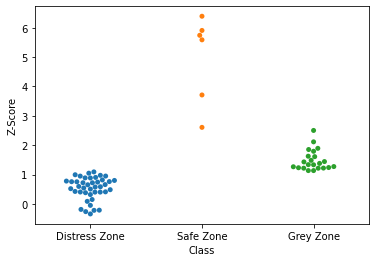

In [3]:
# menampilkan grafik dataset 
sns.swarmplot(x=dataset['Class'],
              y=dataset['Z-Score'])

## **Korelasi fitur**

In [4]:
dataset_corr = dataset.corr()
print('\nKorelasi fitur:')
dataset_corr


Korelasi fitur:


,WCTA,RETA,EBITTA,BVEBVTD,Z-Score
WCTA,1.000000,0.528042,-0.616682,-0.290599,-0.223324
RETA,0.528042,1.000000,-0.374412,-0.002243,0.045986
EBITTA,-0.616682,-0.374412,1.000000,0.048787,0.163176
BVEBVTD,-0.290599,-0.002243,0.048787,1.000000,0.643429
Z-Score,-0.223324,0.045986,0.163176,0.643429,1.000000


## **Memilih target dan fitur**

In [5]:
y = dataset.Class
X = dataset.drop(['Class'], axis=1)

## **Imbalance handling**

In [6]:
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)

print("Imbalance dataset  :", Counter(y))
print("Oversample dataset :", Counter(y_over))

Imbalance dataset  : Counter({'Distress Zone': 42, 'Grey Zone': 22, 'Safe Zone': 6})
Oversample dataset : Counter({'Distress Zone': 42, 'Safe Zone': 42, 'Grey Zone': 42})


## **Standarisasi**

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_over)

MinMaxScaler()

## **Split dataset**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=0)

## **Mendefinisikan base model**

In [9]:
RANDOM_SEED = 0

svc_clf = SVC()
lr_clf = LogisticRegression()
ann_clf = Sequential()

nama_model = []
akurasi = []

## **Bagging**

In [10]:
# membangun bagging model
bagging_svc = BaggingClassifier(svc_clf,  random_state=RANDOM_SEED)
bagging_lr  = BaggingClassifier(lr_clf,  random_state=RANDOM_SEED)
bagging_ann = BaggingClassifier(ann_clf,  random_state=RANDOM_SEED)

bagging_models = []
bagging_models.append(('BaggingSVC', bagging_svc))
bagging_models.append(('BaggingLogisticRegression', bagging_lr))

In [11]:
# voting
bagging_ensemble = VotingClassifier(bagging_models)

# train
bagging_ensemble.fit(X_train, y_train)

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

VotingClassifier(estimators=[('BaggingSVC',
                              BaggingClassifier(base_estimator=SVC(),
                                                random_state=0)),
                             ('BaggingLogisticRegression',
                              BaggingClassifier(base_estimator=LogisticRegression(),
                                                random_state=0))])

In [12]:
# prediksi
y_pred1 = bagging_ensemble.predict(X_test)

## **Boosting**

In [13]:
# training
boosting_ensemble = AdaBoostClassifier(LogisticRegression(),n_estimators=100, random_state=0)
boosting_ensemble.fit(X_train, y_train)

# prediksi 
y_pred2 = boosting_ensemble.predict(X_test)

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

## **Stacking**

In [14]:
Base_models = []
Base_models.append(('LogisticRegression', lr_clf))
Base_models.append(('SVM', svc_clf))

# meta classifier
lr = LogisticRegression(random_state=RANDOM_SEED)

# membangun stacking
stacking_ensemble = StackingClassifier(estimators=Base_models, final_estimator=lr)

# training model
stacking_ensemble.fit(X_train, y_train)

# prediksi target
y_pred3 = stacking_ensemble.predict(X_test)

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

## **Kfold validation**

In [15]:
kf = StratifiedKFold(n_splits=10, shuffle=True)

score1 = cross_val_score(bagging_ensemble, X_test, y_test, cv=kf, scoring='accuracy').mean()
score2 = cross_val_score(boosting_ensemble, X_test, y_test, cv=kf, scoring='accuracy').mean()
score3 = cross_val_score(stacking_ensemble, X_test, y_test, cv=kf, scoring='accuracy').mean()

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\erwin\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

In [16]:
print("Skor kfold akurasi bagging  : {}".format(score1))
print("Skor kfold akurasi boosting : {}".format(score2))
print("Skor kfold akurasi stacking : {}".format(score3))

Skor kfold akurasi bagging  : 0.6833333333333333
Skor kfold akurasi boosting : 0.775
Skor kfold akurasi stacking : 0.7416666666666666


## **Confusion matrix**

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred1)
accuracy1 = accuracy_score(y_test, y_pred1)
nama_model.append("Bagging")
akurasi.append(accuracy1)

print("Confusion matrix dan clasification report bagging : \n")
print(conf_matrix, accuracy1, '\n')
print(classification_report(y_test, y_pred1))

Confusion matrix dan clasification report bagging : 

[[14  0  0]
 [ 6  2  0]
 [ 0  2  8]] 0.75 

               precision    recall  f1-score   support

Distress Zone       0.70      1.00      0.82        14
    Grey Zone       0.50      0.25      0.33         8
    Safe Zone       1.00      0.80      0.89        10

     accuracy                           0.75        32
    macro avg       0.73      0.68      0.68        32
 weighted avg       0.74      0.75      0.72        32



In [18]:
conf_matrix = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
nama_model.append("Boosting")
akurasi.append(accuracy2)

print("Confusion matrix dan clasification report boosting : \n")
print(conf_matrix, accuracy2, '\n')
print(classification_report(y_test, y_pred2))

Confusion matrix dan clasification report boosting : 

[[12  2  0]
 [ 5  3  0]
 [ 0  0 10]] 0.78125 

               precision    recall  f1-score   support

Distress Zone       0.71      0.86      0.77        14
    Grey Zone       0.60      0.38      0.46         8
    Safe Zone       1.00      1.00      1.00        10

     accuracy                           0.78        32
    macro avg       0.77      0.74      0.75        32
 weighted avg       0.77      0.78      0.77        32



In [19]:
conf_matrix = confusion_matrix(y_test, y_pred3)
accuracy3 = accuracy_score(y_test, y_pred3)
nama_model.append("Stacking")
akurasi.append(accuracy3)

print("Confusion matrix dan clasification report stacking : \n")
print(conf_matrix, accuracy3, '\n')
print(classification_report(y_test, y_pred3))

Confusion matrix dan clasification report stacking : 

[[12  2  0]
 [ 1  7  0]
 [ 0  0 10]] 0.90625 

               precision    recall  f1-score   support

Distress Zone       0.92      0.86      0.89        14
    Grey Zone       0.78      0.88      0.82         8
    Safe Zone       1.00      1.00      1.00        10

     accuracy                           0.91        32
    macro avg       0.90      0.91      0.90        32
 weighted avg       0.91      0.91      0.91        32



## **5. Visualisasi**

In [20]:
# tabel hasil evaluasi model berdasarkan akurasi
data = {'Model':nama_model, 'Score':akurasi} 
df_perbadingan = pd.DataFrame(data)   
df_perbadingan

,Model,Score
0,Bagging,0.75000
1,Boosting,0.78125
2,Stacking,0.90625


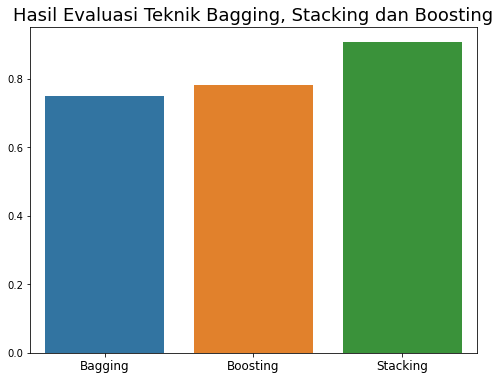

In [21]:
# grafik batang perbandingan hasil akurasi model
plt.figure(figsize=(8,6))
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 12

plt.title("Hasil Evaluasi Teknik Bagging, Stacking dan Boosting")

sns.barplot(x=nama_model, y=akurasi)
plt.show()

## **6. Kesimpulan**

---

<p>Dari percobaan yang dilakukan dibangun 3 model ensemble dengan teknik bagging, boosting, dan stacking. Setelah diuji dengan dataset1016-ai <b>didapat perbandingan hasil performa model stacking lebih baik dari boosting dan bagging</b>.
</p>